# Language detection learning model

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import warnings
import joblib

/Users/lilian/miniconda3/envs/machine-learning-env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

## Discovering the dataset

In [3]:
configs = [
    "arabic", "chinese_simplified", "chinese_traditional", "english", "french", 
    "indonesian", "japanese", "korean", "portuguese", "russian", "spanish", 
    "turkish", "ukrainian"
]

all_data = []

for config in configs:
    print(f"Loading dataset for language: {config}")
    
    dataset = load_dataset("csebuetnlp/xlsum", config)
    
    for split_name, split_data in dataset.items():
        print(f"Processing split: {split_name} for language: {config}")
        
        df = split_data.to_pandas()
        
        cleaned_df = df[["summary"]].copy()
        cleaned_df["language"] = config
        
        all_data.append(cleaned_df)

data = pd.concat(all_data, ignore_index=True)

Loading dataset for language: arabic
Processing split: train for language: arabic
Processing split: test for language: arabic
Processing split: validation for language: arabic
Loading dataset for language: chinese_simplified
Processing split: train for language: chinese_simplified
Processing split: test for language: chinese_simplified
Processing split: validation for language: chinese_simplified
Loading dataset for language: chinese_traditional
Processing split: train for language: chinese_traditional
Processing split: test for language: chinese_traditional
Processing split: validation for language: chinese_traditional
Loading dataset for language: english
Processing split: train for language: english
Processing split: test for language: english
Processing split: validation for language: english
Loading dataset for language: french
Processing split: train for language: french
Processing split: test for language: french
Processing split: validation for language: french
Loading dataset 

In [4]:
data.head()

,summary,language
0,بدأت القوات الأوكرانية الانسحاب من شبه جزيرة ا...,arabic
1,"""هل سيتم تغيير العبارة الشهيرة للمؤرخ اليوناني...",arabic
2,قالت الشرطة في القطاع الهندي من إقليم كشمير إن...,arabic
3,في عام 816، تجول راهب يدعى كوكاي، في المنحدرات...,arabic
4,"أكد مصدر في ""الحراك التهامي"" لأبناء محافظة الح...",arabic


In [5]:
data.describe()

,summary,language
count,828133,828133
unique,819889,13
top,轉會傳聞,english
freq,263,329592


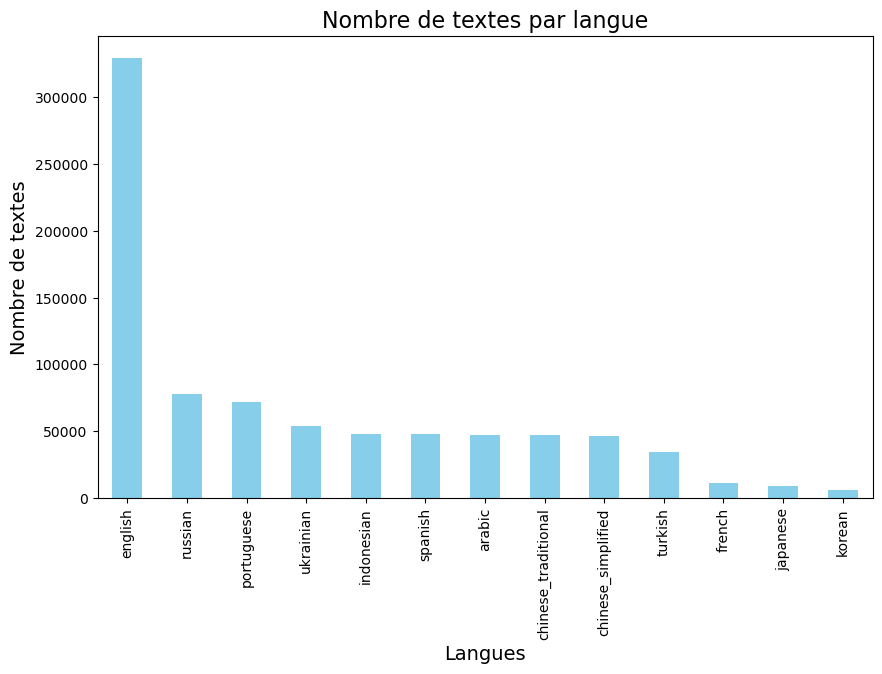

In [6]:
texts_per_language = data['language'].value_counts()

plt.figure(figsize=(10, 6))
texts_per_language.plot(kind='bar', color='skyblue')

plt.title('Nombre de textes par langue', fontsize=16)
plt.xlabel('Langues', fontsize=14)
plt.ylabel('Nombre de textes', fontsize=14)

plt.show()

In [7]:
data.isnull().sum()

summary     0
language    0
dtype: int64

## Text preprocessing

In [9]:
x = np.array(data["summary"])
y = np.array(data["language"])

In [10]:
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
def clean_text(text):
    text = re.sub(r'[!@#$(),"%^*?:;~`]', ' ', text)
    text = text.lower()
    return text

x = data['summary'].apply(clean_text)

In [12]:
cv = CountVectorizer()
X = cv.fit_transform(x)
X.shape

(828133, 943217)

In [13]:
data[data["language"] == "japanese"].head()

,summary,language
528575,タイ北部のタムルアン洞窟で10日夜、中に閉じ込められていた少年12人とサッカー・コーチの計1...,japanese
528576,2016年米大統領選へのロシア介入疑惑を捜査したロバート・ムラー米特別検察官は29日朝、司法...,japanese
528577,ドナルド・トランプ米大統領は11日、自分が核兵器を現在の10倍欲しがっていると伝えた米NBC...,japanese
528578,一時は危ぶまれたものの、ドナルド・トランプ米大統領と北朝鮮の金正恩（キム・ジョンウン）朝鮮労...,japanese
528579,韓国軍は3日、北朝鮮が再び弾道ミサイルの発射実験を行ったと発表した。中距離弾道ミサイル「ノド...,japanese


## Text classification

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [16]:
y_pred = model.predict(X_test)

In [17]:
ac = accuracy_score(y_test, y_pred)
print("Accuracy is :", ac)

Accuracy is : 0.9443629359947352


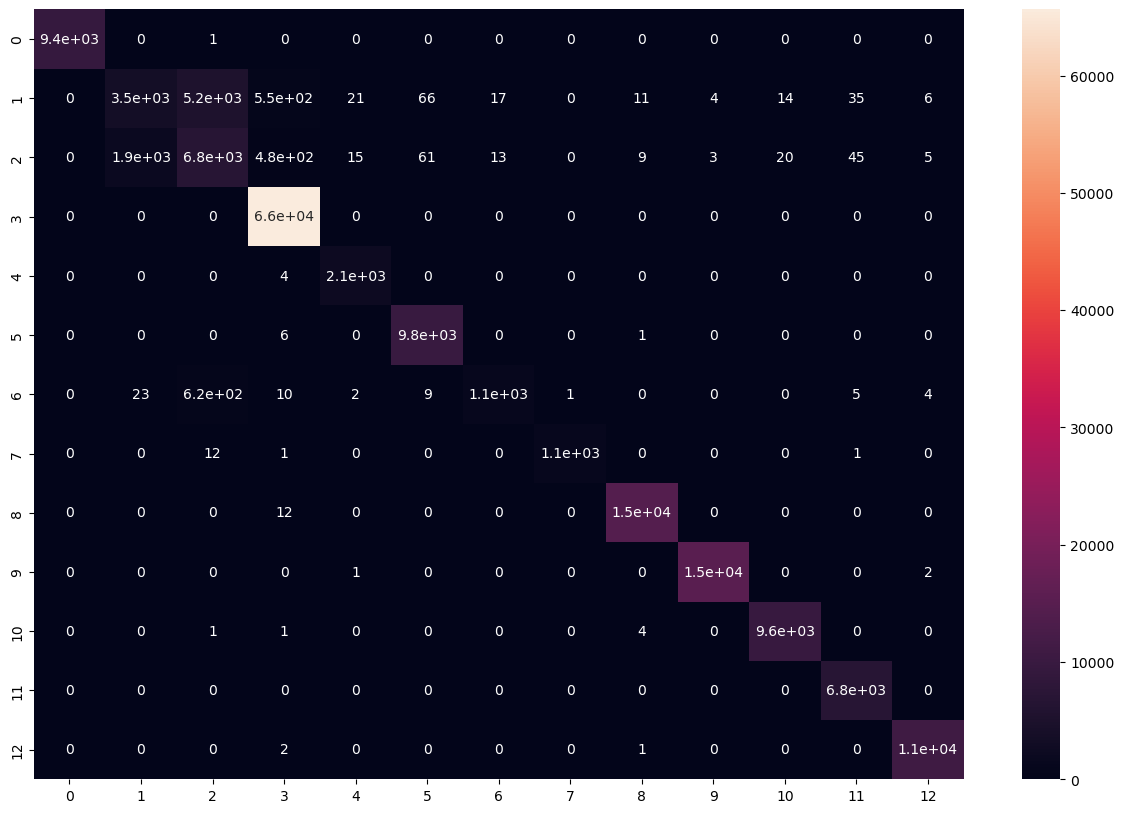

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

## Usage

In [19]:
def predict(text):
     x = cv.transform([text]).toarray()
     lang = model.predict(x)
     lang = le.inverse_transform(lang)
     print(lang[0])

In [20]:
examples = {
    "arabic": "الناس رائعون",
    "chinese_simplified": "人们很棒",
    "chinese_traditional": "人們很棒",
    "english": "People are awesome",
    "french": "Les gens sont incroyables",
    "indonesian": "Orang-orang itu hebat",
    "japanese": "人々は素晴らしいです",
    "korean": "사람들은 대단해요",
    "portuguese": "As pessoas são incríveis",
    "russian": "Люди потрясающие",
    "spanish": "Las personas son asombrosas",
    "turkish": "İnsanlar harika",
    "ukrainian": "Люди чудові"
}

In [21]:
predict(examples["french"])

french


In [22]:
predict(examples["russian"])

russian


In [23]:
predict(examples["japanese"])

english


In [24]:
predict(examples["portuguese"])

portuguese


In [25]:
predict(examples["turkish"])

turkish


## Export

In [26]:
joblib.dump(cv, "count_vectorizer.pkl")

['count_vectorizer.pkl']

In [27]:
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [28]:
joblib.dump(model, "language_model.pkl")

['language_model.pkl']